### siec komputerowa o N wezlach i topologii
- liniowej
- pierscieniowej
- karty - kazdy wezel komunikuje sie z kazdym.
Trasy wyznaczone najkrotsza sciezka (krawedzie nie maja wag)
wyznacz:
- srednia dlugosc trasy 
- srednie opoznienie kazdego lacza (krawedzi)
  -  $T_L  = \frac{1}{(F + 1) - f_L}$
-  $T_L$ - opoznienie lacza L
- L - numer lacza (krawedzi)
- F - liczba wszystkich transmisji (wybranych najkrotszych sciezek)
- $f_L$ - liczba transmisji dla ktorych trasa wykorzystuje lacze L



In [143]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from utils import create_edges
from itertools import combinations

In [144]:
N =   9# must be a power of some number
nodes = [chr(i) for i in range(65, 65 + N)]


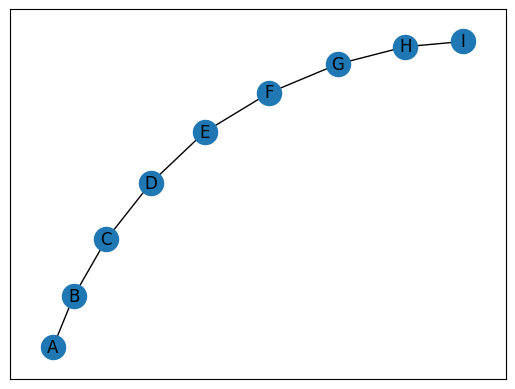

In [145]:
G = nx.Graph(nodes = nodes)
edges = []
for i in range(len(nodes) - 1):
            edges.append((nodes[i], nodes[i + 1]))
G.add_edges_from(edges)
nx.draw_networkx(G, with_labels=True)

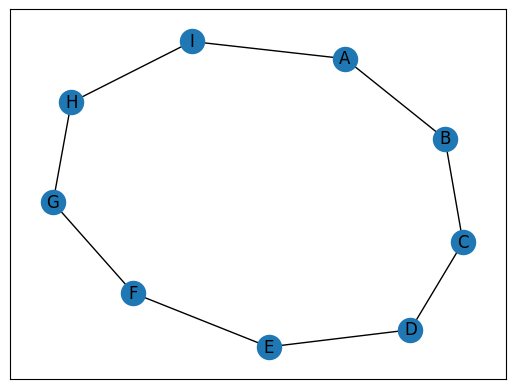

In [146]:
G2 = nx.cycle_graph(nodes)
nx.draw_networkx(G2, with_labels=True)

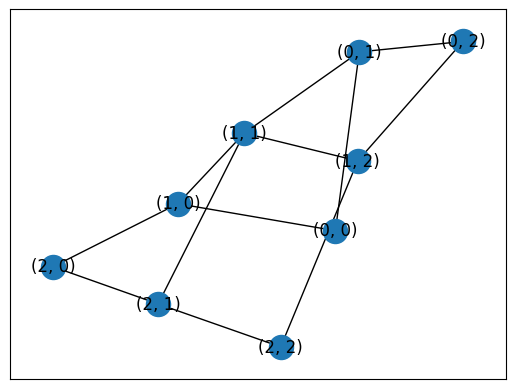

In [147]:
G3 = nx.grid_2d_graph(int(np.sqrt(N)), int(np.sqrt(N)))
nx.draw_networkx(G3, with_labels=True)
nodes = list(G3.nodes())

In [148]:
def create_paths(G):
    pairs = list(combinations(G.nodes(), 2))
    paths = []
    for pair in pairs:
        path = nx.shortest_path(G, pair[0], pair[1])
        for i in range(len(path) - 1):
            paths.append((path[i], path[i + 1]))
    return paths
print(len(create_paths(G)))
print(len(create_paths(G2)))
print(len(create_paths(G3)))

120
90
72


In [149]:

def delay(G):
    paths = create_paths(G)
    F = N*(N-1)//2   
    delays = [] 
    for edge in list(G.edges):
        f = paths.count(edge)
        delays.append(1/((F+1)-f))
    
    return np.mean(delays)


In [150]:
for graph, name in zip([G, G2, G3], ['linear', 'cycle', 'grid']):
    print(f"average shortest path length in {name}: {nx.average_shortest_path_length(graph):.2f}")
    print(f"average delay in {name}: {delay(graph):.5f}")
    

average shortest path length in linear: 3.33
average delay in linear: 0.04735
average shortest path length in cycle: 2.50
average delay in cycle: 0.03442
average shortest path length in grid: 2.00
average delay in grid: 0.03133


## jak szybko rozprzestrzenia sie plotka
### zalozenia:
- losowa struktura spolecznosci
- K - w kazdej iteracji plotka rozprzestrzenia sie do K % wszystkich powiazan.